# Visualization and Quick Plots
### by [Kate Vavra-Musser](https://vavramusser.github.io) for the [R Spatial Notebook Series](https://vavramusser.github.io/r-spatial)

## Introduction
Visualization is a critical step in spatial analysis, enabling us to explore and communicate patterns in spatial data effectively. This notebook focuses on quick visualization techniques, which are essential during the exploratory phase of analysis. By visualizing your data early on, you can uncover trends, detect outliers, and gain insights that inform the rest of your workflow.

This notebook is the foundation for the rest of the "Mapping and Visualization" chapter. Later notebooks will dive deeper into working with point and polygon data, choropleth mapping, and advanced tools like leaflet and tmap.

### Notebook Goals
Learn how to create quick, static plots of spatial data.  Use R's sf package to handle spatial data efficiently.  Leverage ggplot2 for clean and customizable visualizations.  Address common challenges, such as working with projections and large datasets.

By the end of this notebook, you'll be able to: Quickly visualize spatial data to assess its structure and content.  Use plotting techniques that set the stage for more advanced mapping.

### ✨ Prerequisites ✨
* Complete [Introduction to sf: Reading, Writing, and Inspecting Vector Data](https://platform.i-guide.io/notebooks/9968babe-22e4-4c3d-98e2-d8b45e9672cd)
* Complete [Working with CRS: Reprojection and Transformation](https://platform.i-guide.io/notebooks/76912ca7-73e4-437e-8ecf-0cb456bd7282)
* Complete [Preparing Vector Data for Analysis](https://platform.i-guide.io/notebooks/44926d85-7f08-4774-a103-a22ff3876cad)
* Complete [IPUMS NHGIS Data Extraction Using ipumsr: Supplemental Exercise 2](https://platform.i-guide.io/notebooks/bc79eda6-8353-42ea-8cb7-5db70aa6febf)

### 💽 Data Used in this Notebook 💽
* United States State Boundaries Shapefile (*ipums_nhgis_states.shp*)
  * If you worked through [IPUMS NHGIS Data Extraction Using ipumsr: Supplemental Exercise 2](https://platform.i-guide.io/notebooks/bc79eda6-8353-42ea-8cb7-5db70aa6febf) you should have created and saved a copy of *ipums_nhgis_states.shp* in the final section of the notebook.
  * You can download a copy of *ipums_nhgis_states.zip* file from [the I-GUIDE platform](https://platform.i-guide.io/datasets/1a5acd50-4741-447a-bf36-2331b39559af) or directly from [Kate's GitHub](https://github.com/vavramusser/r-spatial/blob/main/ipums_nhgis_states.zip).  You will need to unzip *ipums_nhgis_states.zip* and extract *ipums_nhgis_states.shp* file to your workspace.

### Notebook Overview
1. Setup
2. Basic Spatial Data Plotting
3. Mapping with ggplot2

---

## 1. Setup

This notebook requires the following R packages and functions.

[**ggplot2**](https://cran.r-project.org/web/packages/ggplot2/index.html) · Create Elegant Data Visualisations Using the Grammar of Graphics · A system for *declaratively* creating graphics, based on *The Grammar of Graphics*. You provide the data, tell *ggplot2* how to map variables to aesthetics, what graphical primitives to use, and it takes care of the details. · This notebook uses the following functions from *ggplot2*.

* *CoordSf* · visualize sf objects
  * *geom_sf* · geometric objects (points, lines, or polygons)
* [*ggplot*](https://rdrr.io/cran/ggplot2/man/ggplot.html) · create a new ggplot
* [*labs*](https://rdrr.io/cran/ggplot2/man/labs.html) · modify axis, legend, and plot labels
* [*ggtheme*](https://rdrr.io/cran/ggplot2/man/ggtheme.html) · complete themes
  * *theme_minimal* · minimal theme

[**sf**](https://cran.r-project.org/web/packages/sf/index.html) · Support for [simple features](https://r-spatial.github.io/sf/articles/sf1.html), a standardized way to encode spatial vector data - Binds to [*GDAL*](https://gdal.org/en/stable) for reading and writing data, to [*GEOS*](https://libgeos.org) for geometrical operations, and to [*PROJ*](https://proj.org/en/stable) for projection conversions and datum transformations - Uses by default the [*s2*](https://cran.r-project.org/web/packages/s2/index.html) package for spherical geometry operations on ellipsoidal (long/lat) coordinates · This notebook uses the following functions from *sf*.

* [*st_read*](https://rdrr.io/cran/sf/man/st_read.html) · read simple features or layers from file or database
* [*st_transform*](https://rdrr.io/cran/sf/man/st_transform.html) · transform or convert coordinates of simple feature
* [*st_write*](https://rdrr.io/cran/sf/man/st_write.html) · write simple features object to file or database

[**viridis**](https://cran.r-project.org/web/packages/viridis/index.html) · Colorblind-Friendly Color Maps for R · Color maps designed to improve graph readability for readers with common forms of color blindness and/or color vision deficiency. The color maps are also perceptually-uniform, both in regular form and also when converted to black-and-white for printing. This package also contains [*ggplot2*](https://cran.r-project.org/web/packages/ggplot2/index.html) bindings for discrete and continuous color and fill scales. A lean version of the package called [*viridisLite*](https://cran.r-project.org/web/packages/viridisLite/index.html) that does not include the *ggplot2* bindings is also available. · This notebook uses the following functions from *viridis*.

* [*scale_fill_viridis*](https://rdrr.io/cran/viridis/man/scale_viridis.html) · Viridis Color Scales for [*ggplot2*](https://cran.r-project.org/web/packages/ggplot2/index.html)

### 1a. Install and Load Required Packages
If you have not already installed the required packages, uncomment and run the code below:

In [ ]:
# install.packages(c("ggplot2", "sf", "viridis"))

Load the packages into your workspace.

In [ ]:
library(ggplot2)
library(sf)
library(viridis)

In [ ]:
# load example spatial data
usa_states <- st_read("ipums_nhgis_states.shp")

In [ ]:
# inspect the data
print(usa_states)

## 2. Basic Spatial Data Plotting

Before diving into advanced visualization techniques, it’s helpful to understand how to create simple maps using base R plotting functions. These quick visualizations are often used in the early stages of spatial analysis to get a sense of the structure, extent, and contents of a spatial dataset.

In this section, we:

- Read and inspect vector spatial data using the sf package.
- Use the base R plot() function to create quick, informative maps with minimal setup.

While base R plots lack the customization of other approaches, they are ideal for:

- Verifying data was loaded and parsed correctly.
- Quickly exploring spatial attributes and geometries.
- Creating maps with minimal code or dependencies.

This is a great starting point for newcomers to spatial analysis in R, and it helps build an intuitive understanding of how spatial objects behave.

plot(st_geometry(usa_states))

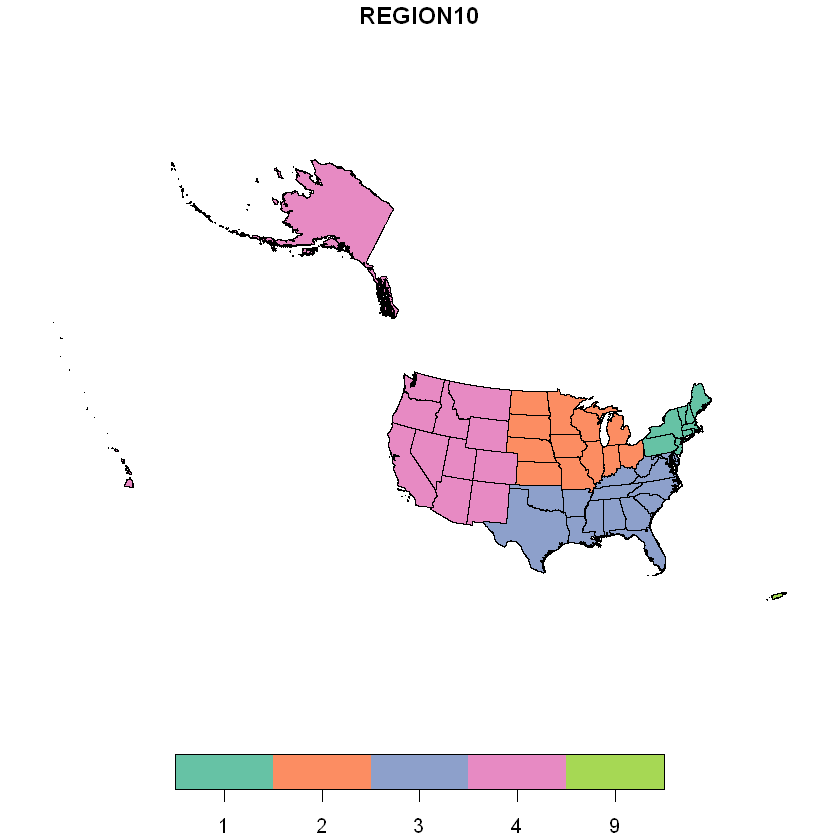

In [5]:
plot(usa_states["REGION10"])

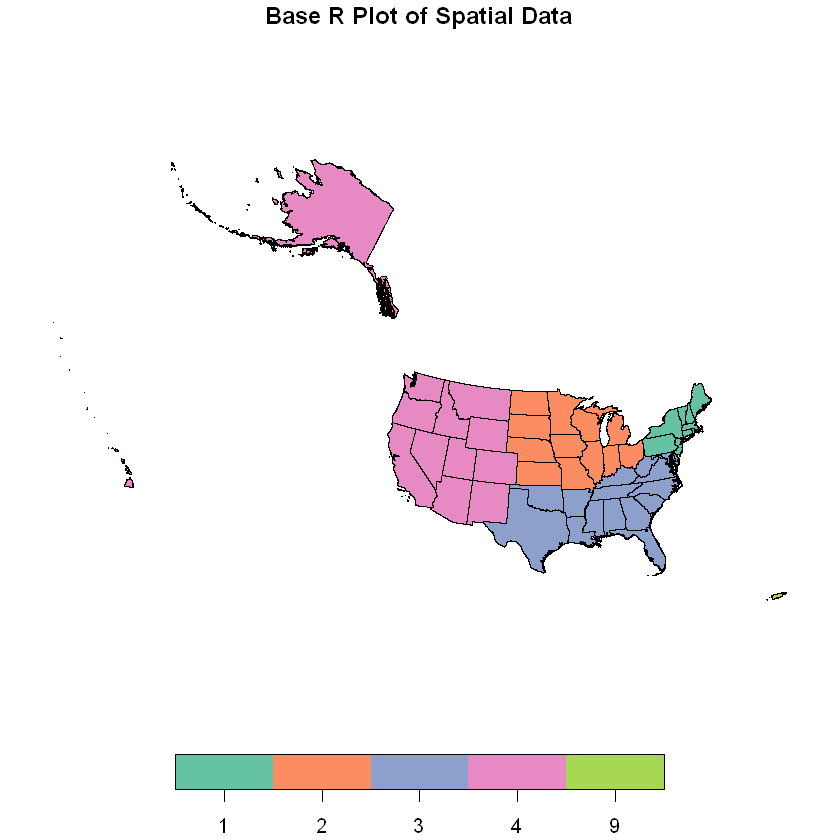

In [6]:
plot(usa_states["REGION10"], main = "Base R Plot of Spatial Data")

## 3. Mapping with *ggplot2*

The [*ggplot2*](https://cran.r-project.org/web/packages/ggplot2/index.html) package is a powerful and flexible system for creating static graphics in R, and it's especially useful for producing high-quality maps when used in combination with the [*sf*](https://cran.r-project.org/web/packages/sf/index.html) package.

In this section, we explore how to build maps with [*ggplot2*](https://cran.r-project.org/web/packages/ggplot2/index.html), starting from simple geometry plots and progressing to full thematic visualizations. [*ggplot2*](https://cran.r-project.org/web/packages/ggplot2/index.html) provides fine-grained control over map appearance, allowing you to customize colors, labels, legends, and more.

Advantages of using [*ggplot2*](https://cran.r-project.org/web/packages/ggplot2/index.html) for mapping include:

- Seamless integration with tidyverse workflows.
- Layered syntax that makes it easy to incrementally build complex maps.
- Extensive customization options for styling and annotation.

We'll begin by learning how to plot just the geometry of spatial features—such as borders, shapes, and points—before layering in additional information.

### 3.1 Plotting Geometry

A great first step in using [*ggplot2*](https://cran.r-project.org/web/packages/ggplot2/index.html) for spatial visualization is to plot only the geometries in your spatial object - without attaching any specific attributes or variables. This allows you to quickly assess the shapes, locations, and layout of your data.

We use *geom_sf()* to render spatial objects created with the [*sf*](https://cran.r-project.org/web/packages/sf/index.html) package. When no fill or color aesthetic is specified, [*ggplot2*](https://cran.r-project.org/web/packages/ggplot2/index.html) will use default values to outline polygons or plot points.

This kind of geometry-only plot is useful for:

- Exploring the structure and coverage of your spatial data.
- Confirming that your coordinate reference system (CRS) looks appropriate.
- Setting the stage for thematic mapping in subsequent steps.

Up next, we’ll map attributes—linking visual elements like color to data variables.

In [ ]:
# basic plot using ggplot2 and geom_sf
ggplot(data = usa_states) +
    geom_sf() +
    theme_minimal()

### 3.2 Plotting Attributes

Once you've mapped the raw geometries, the next step is to visualize the attributes associated with those spatial features. This is the essence of thematic mapping - using color, size, or shape to represent data values tied to geography.

Using [*ggplot2*](https://cran.r-project.org/web/packages/ggplot2/index.html), we can map variables by assigning them to aesthetics like fill, color, or size. For example, we might shade polygons based on population density, or color points based on category or count.

In this section, you’ll learn how to:

- Use the aes() function within geom_sf() to link spatial data attributes to visual elements.
- Control how data-driven attributes are mapped to the appearance of the plot.
- Create visual representations of social or environmental phenomena using real data.

These maps are often called choropleths (for polygons) or graduated symbol maps (for points)—and they serve as powerful tools for pattern detection and storytelling.

In [ ]:
# basic plot using ggplot2 and geom_sf
ggplot(data = usa_states) +
    geom_sf(aes(fill = REGION10)) +
    theme_minimal()

### 3.3 Adding Titles, Labels, and Legends

As your maps become more detailed, it's important to guide the viewer with meaningful titles, axis labels, and legends. These elements provide essential context and help users interpret your map correctly.

In ggplot2, these features are easy to add using functions like labs() for titles and axis labels, and guides() or theme() for customizing legend appearance.

In this section, you’ll learn how to:

- Add and customize map titles, subtitles, and captions.
- Modify axis labels or remove them when appropriate for spatial data.
- Control the display of legends—adjusting their position, title, and layout.

Adding clear, descriptive annotations turns a basic plot into a polished and professional map, helping you communicate your insights more effectively.

In [ ]:
# basic plot using ggplot2 and geom_sf
ggplot(data = usa_states) +
    geom_sf(aes(fill = REGION10)) +
    labs(title = "Region by State",
         fill = "Region") +
    theme_minimal()

### 3.4 Adjusting Color Palettes

Effective use of color can significantly improve the readability and impact of your maps. In this section, we explore how to fine-tune the color palettes used for attribute-based mapping.

Whether you're mapping continuous variables (like income or temperature) or categorical ones (like land use types), choosing the right palette is essential for conveying your message clearly and accessibly.

Here you'll learn how to:

- Apply color palettes using scale_fill_*() and scale_color_*() functions.
- Choose appropriate palettes for sequential, diverging, and qualitative data.
- Use colorblind-friendly and perceptually uniform palettes, such as those from the viridis and RColorBrewer packages.

Good color choices are not just aesthetic—they also help ensure your maps are readable and interpretable by a broader audience, including those with color vision deficiencies.

Choosing appropriate color palettes is crucial when visualizing spatial data. Effective palettes help communicate the underlying data clearly and accurately, especially when color is used to represent continuous or categorical attributes.

**Best practices:**
- Use sequential palettes (e.g., Blues, Viridis) for continuous data.
- Use qualitative palettes (e.g., Set1, Dark2) for categorical data.
- Choose colorblind-friendly palettes where possible.
- Use perceptually uniform palettes (like `viridis`) for improved readability.

Below are some examples using `ggplot2` and `viridis`.

In [ ]:
#ggplot(data = usa_states) +
#  geom_sf(aes(fill = STATEFP10)) +
#  scale_fill_viridis_c(option = "plasma", name = "Region by State") +
#  theme_minimal() +
#  labs(title = "Population Density by Region")

## 4. Comparing Plotting Approaches: `plot()`, `ggplot2`, and `tmap`

There are multiple ways to create maps in R, each with its own strengths depending on your goals, workflow, and audience:

- `plot()` is fast and simple — great for quick data checks and exploratory work.
- `ggplot2` is highly customizable and integrates well with tidyverse data pipelines.
- `tmap` provides easy thematic mapping with high-level functions and supports both static and interactive mapping modes.

This section offers a side-by-side comparison of the same spatial dataset visualized using each approach. By viewing them together, you can begin to identify which tool best suits your needs—whether you're conducting rapid spatial exploration, building publication-quality maps, or preparing interactive visualizations for the web.

As you move into the next chapters, you'll get hands-on experience using both ggplot2 and tmap in greater depth, applying them to real-world social science and environmental data.

In [ ]:
# Base R plot
plot(your_sf_object["population_density"], main = "Base R plot")

In [ ]:
# ggplot2
ggplot(data = your_sf_object) +
  geom_sf(aes(fill = population_density)) +
  theme_minimal() +
  labs(title = "ggplot2 Plot")

In [ ]:
# tmap
library(tmap)
tm_shape(your_sf_object) +
  tm_fill("population_density", palette = "Blues", title = "Population Density") +
  tm_borders() +
  tm_layout(title = "tmap Plot")

## 5. Exporting Maps

Once you're happy with a map, you may want to save it for reports, presentations, or sharing.

- Use `ggsave()` to export `ggplot2` visualizations.
- Use `tmap_save()` to export `tmap` visualizations.

Here's how to save a map to file:

In [ ]:
# ggplot2 example
p <- ggplot(data = usa_states) +
  geom_sf(aes(fill = population_density)) +
  theme_minimal()

ggsave("population_map.png", plot = p, width = 8, height = 6)

# tmap example
tm <- tm_shape(your_sf_object) +
  tm_fill("population_density") +
  tm_borders()

tmap_save(tm, filename = "tmap_population_map.png")

---

## Next Steps

* Continue to [**Chapter 6.2 Mapping Point and Polygon Data**](https://platform.i-guide.io/notebooks/2b9f579c-32b0-4078-af39-994bb31d50ec)
* Continue to [**Chapter 6.3 Choropleth Mapping**](https://platform.i-guide.io/notebooks/f2f973df-2412-49f0-ad39-d80051f20d4d)
* Move on to Chapter 7: Foundational Spatial Analyses
  * [**Chapter 7.1 Geometric Binary Predicates: The Building Blocks of Geometric Queries**](https://platform.i-guide.io/notebooks/06a40182-91cc-4ed4-befb-7dad6ff99966)
  * [**Chapter 7.2 Spatial Joins and Filter by Location**](https://platform.i-guide.io/notebooks/a4f2cf0c-b777-4811-8aa1-6d5420795)
  * [**Chapter 7.3 Distance and Nearest Neighbor Calculations**](https://platform.i-guide.io/notebooks/02f7f46b-c45f-4a06-81e0-d7df3f81ca23)
* Return to the [**R Spatial Notebooks Project Chapter List**](https://vavramusser.github.io/r-spatial/#:~:text=Chapter%201%3A%20Data%20Sources%20and%20APIs) to view a list of all available notebooks organized in the R Spatial Notebooks chapter structure.
* Visit the [**R Spatial Notebooks Project Homepage**](https://vavramusser.github.io/r-spatial) to learn more about the project, view the list of all notebooks, and explore additional resources.
* Join the project [**Mailing List**](https://mailchi.mp/ab01e8fc8397/r-spatial-email-signup) to hear about future notebook releases and other updates.
* If you have an idea for a new notebook please submit your idea via the [**Suggestion Box**](https://us19.list-manage.com/survey?u=746bf8d366d6fbc99c699e714&id=54590a28ea&attribution=false).

---

## ★ Thank You ★

Thank you so much for engaging with this notebook and supporting the project!  The R Spatial Notebooks Project is a labor of love so if you enjoy or benefit from these notebooks, please consider [**Donating to the Project**](https://buymeacoffee.com/vavramusser).  Your support allows me to continue producing notebooks and supporting the R Spatial Notebooks community.